## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouseDataFile = "data/Mouse_metadata.csv"
studyDataFile = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseDataFile)
studyData = pd.read_csv(studyDataFile)


# Combine the data into a single dataset
# Display the data table for preview - mini view (5)
combineData = pd.merge(studyData, mouseData, on="Mouse ID", how="left")
combineData.head()
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Check the number of mice.
# pd.Dataframe()

mouseData.count()


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [43]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
# mouse_count = len(["Mouse ID"].unique()) - check?

# Creating a DataFrame object 
df = pd.DataFrame(combineData, 
                  columns = ['Mouse ID', 'Timepoints']) 
  
# Selecting duplicate rows except first  
# occurrence based on all columns 
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 




Duplicate Rows :


,Mouse ID,Timepoints
137,g989,NaN
250,a275,NaN
251,w575,NaN
252,x822,NaN
253,l509,NaN
...,...,...
1888,r944,NaN
1889,u364,NaN
1890,p438,NaN
1891,x773,NaN


In [44]:
# Drop any duplicate rows
# dropping the rows having NaN values 
df = df.dropna() 
  
# printing the result 
df 

,Mouse ID,Timepoints


In [45]:
# Recheck the number of mice
# To reset the indices  
df = df.reset_index(drop = True) 
  
# Print the dataframe 
df 


,Mouse ID,Timepoints


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

summaryData = combineData[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
# Create data list to confirm (first 5)

combineData.groupby("Drug Regimen")
groupByData = combineData.groupby("Drug Regimen")
summaryDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
summaryDF.head()


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


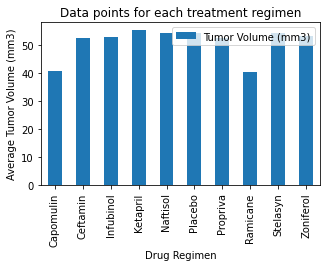

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot Bar Chart 
summaryDF.plot(kind="bar", figsize=(5,3))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

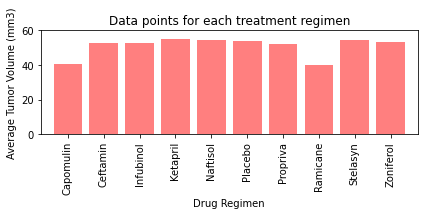

In [15]:
# Generate identical bar plot using pyplot instead of pandas.
xAxis = np.arange(len(summaryDF))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(6, 3))
plt.bar(xAxis, summaryDF["Tumor Volume (mm3)"], color='red', alpha=0.5)
plt.xticks(tickLocations, list(summaryDF.index), rotation="vertical") #, summaryDF["Drug Regimen"]
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()


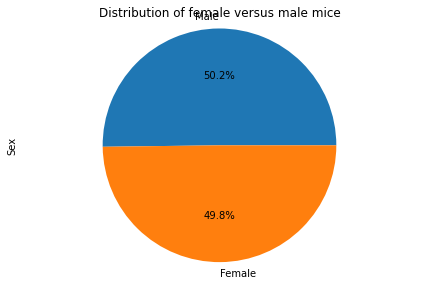

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceCount = mouseData["Sex"].value_counts()
plt.figure()
miceCount.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()


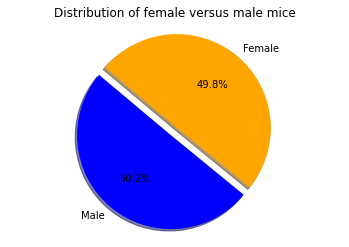

In [18]:
# Generate identical pie plot using pyplot
colors = ["blue","orange"]
explode = (0.1,0)
plt.figure()
plt.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimenData = combineData[(combineData["Drug Regimen"] == "Capomulin") | 
                          (combineData["Drug Regimen"] == "Ramicane") | 
                          (combineData["Drug Regimen"] == "Infubinol") | 
                          (combineData["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()




,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [22]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.


##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


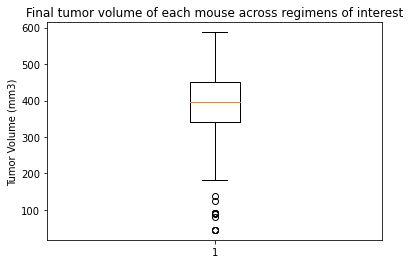

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(regimenPlot)
plt.show()


## Line and Scatter Plots

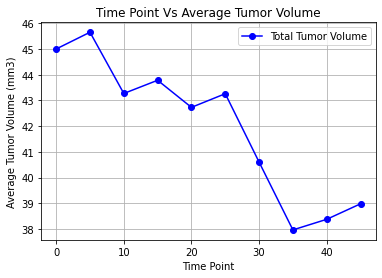

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorData = combineData[(combineData["Drug Regimen"] == "Capomulin") & (combineData["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

# Confirm data (first 5 data)

scatterData = combineData[(combineData["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<Figure size 432x288 with 0 Axes>

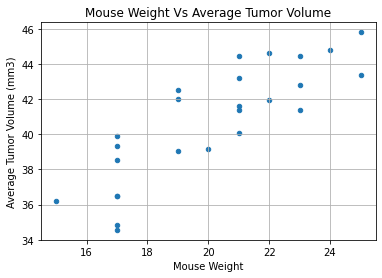

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatterDataDF["Weight (g)"], scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


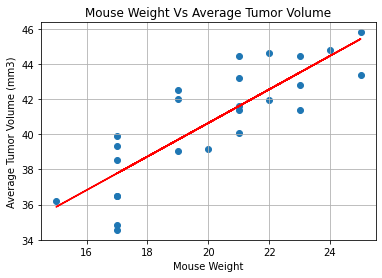

In [28]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterDataDF["Weight (g)"]
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.xlim(13, 26)
# plt.ylim(30, 50)
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

# Observations and Insights